In [1]:
import time
import os
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.cross_validation import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.base import clone

## Load data & pre-processing

In [3]:
file_X = "data_overfeat.npy"
X = np.load(file_X)
X = StandardScaler().fit_transform(X)

In [4]:
# Load y
file_y = "latin_labels" # or "french_labels"
y = map(lambda l:l.decode("utf-8")[0:-1], open(file_y).readlines())
y = np.array(y, dtype='unicode')

counts = Counter(y)
classes = counts.keys()
nb = counts.values()

most_frequent_classes = map(lambda (c, n):c,
                            sorted( zip(classes, nb), key=lambda (c, n):n, reverse=True))
# take 5 most frequent classes
nb_most_freq = 5
most_frequent_classes = most_frequent_classes[0:nb_most_freq]

# construct a filter of examples according to the most frequent classes
most_freq = (y == most_frequent_classes[0])
for c in most_frequent_classes[1:]:
    most_freq |= (y == c)

##Visualizations

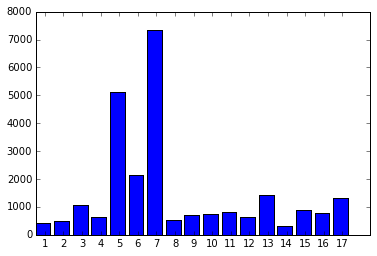

In [5]:
counts = Counter(y)
classes = counts.keys()
nb = counts.values()

indexes = np.arange(len(classes))
width = 0.5
plt.bar(indexes, nb)
plt.xticks(indexes + width, indexes + 1)
plt.legend
plt.show()

## Training

In [6]:
X_, y_ = X[most_freq], y[most_freq]

kf = StratifiedKFold(y_, n_folds=5)
#model = LinearSVC(loss='l2', dual=False, tol=0.1, C=0.0001, class_weight='auto')
model = RandomForestClassifier()
scores = []
for train_index, test_index in kf:
    X_train, y_train = X_[train_index], y_[train_index]
    X_test, y_test = X_[test_index], y_[test_index]
    
    clf = clone(model)
    
    t = time.time()
    clf.fit(X_train, y_train)
    duration = time.time() - t
    
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_pred, y_test)
    print(score)
    print(confusion_matrix(y_pred, y_test))
    print(classification_report(y_pred, y_test))
    print("Training duration : %fs" % (duration,))
    scores.append(score)

0.671370967742
[[1290  322  202  124   86]
 [ 126  678   38   65   21]
 [  31    9  173   16   29]
 [  13    6    7   67    4]
 [  11    6   12   13  123]]
             precision    recall  f1-score   support

Apis mellifera       0.88      0.64      0.74      2024
     Bombus       0.66      0.73      0.70       928
Episyrphus balteatus       0.40      0.67      0.50       258
Neomyia, Calliphora et autres       0.24      0.69      0.35        97
   Polistes       0.47      0.75      0.57       165

avg / total       0.75      0.67      0.69      3472

Training duration : 20.015070s
0.67060518732
[[1275  309  211  125   90]
 [ 148  697   35   61   18]
 [  37    8  169   26   30]
 [   6    6    8   69    8]
 [   4    1    8    4  117]]
             precision    recall  f1-score   support

Apis mellifera       0.87      0.63      0.73      2010
     Bombus       0.68      0.73      0.70       959
Episyrphus balteatus       0.39      0.63      0.48       270
Neomyia, Calliphora et autres

MemoryError: 

In [8]:
scores = np.array(scores)
print(scores)
print(scores.mean())
print(scores.std())

[ 0.68179012  0.66676961  0.67964164  0.63793636  0.64524104]
0.662275755394
0.0178054322116
